In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier , export_text , plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,jaccard_score,fbeta_score,classification_report

In [13]:
df=pd.read_csv('data.csv')
print('shape:',df.shape)
print('type:','\n',df.dtypes)
df.head()

shape: (1319, 9)
type: 
 Age                           int64
Gender                        int64
Heart rate                    int64
Systolic blood pressure       int64
Diastolic blood pressure      int64
Blood sugar                 float64
CK-MB                       float64
Troponin                    float64
Result                       object
dtype: object


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,63,1,66,160,83,160.0,1.80,0.012,negative
1,20,1,94,98,46,296.0,6.75,1.060,positive
2,56,1,64,160,77,270.0,1.99,0.003,negative
3,66,1,70,120,55,270.0,13.87,0.122,positive
4,54,1,64,112,65,300.0,1.08,0.003,negative


In [14]:
print(df.isnull().sum())
df.describe()

Age                         0
Gender                      0
Heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Blood sugar                 0
CK-MB                       0
Troponin                    0
Result                      0
dtype: int64


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.193328,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.638173,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [15]:
x=df[['Age','Gender','Heart rate','Systolic blood pressure','Diastolic blood pressure','Blood sugar','CK-MB','Troponin']].values
print('infinite:',np.isinf(x).sum())
y=df[['Result']].values
y=y.ravel()
y=LabelEncoder().fit(['negative','positive']).transform(y)
y

infinite: 0


array([0, 1, 0, ..., 1, 1, 1])

In [16]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4,max_leaf_nodes=5,random_state=42)
model.fit(xtrain,ytrain)
ypredict=model.predict(xtest)
matrics=confusion_matrix(ytest,ypredict)
print(classification_report(ytest,ypredict),'\n','fbeta_score:',fbeta_score(ytest,ypredict,beta=2))
print('jaccard_score:',jaccard_score(ytest,ypredict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264
 
 fbeta_score: 0.9865196078431373
jaccard_score: 0.9698795180722891


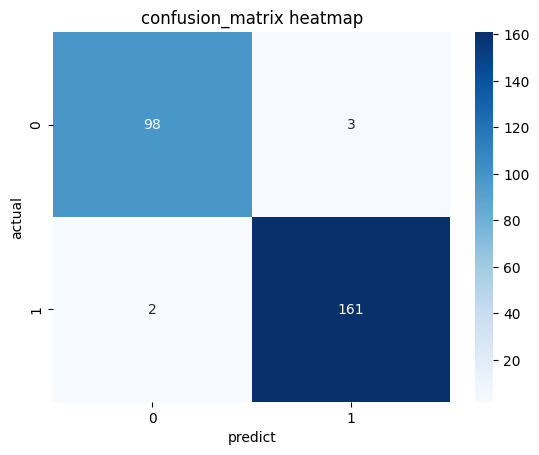

In [18]:
sns.heatmap(pd.DataFrame(matrics),annot=True,fmt='d',cmap='Blues')
plt.title('confusion_matrix heatmap')
plt.xlabel('predict')
plt.ylabel('actual')
plt.show()

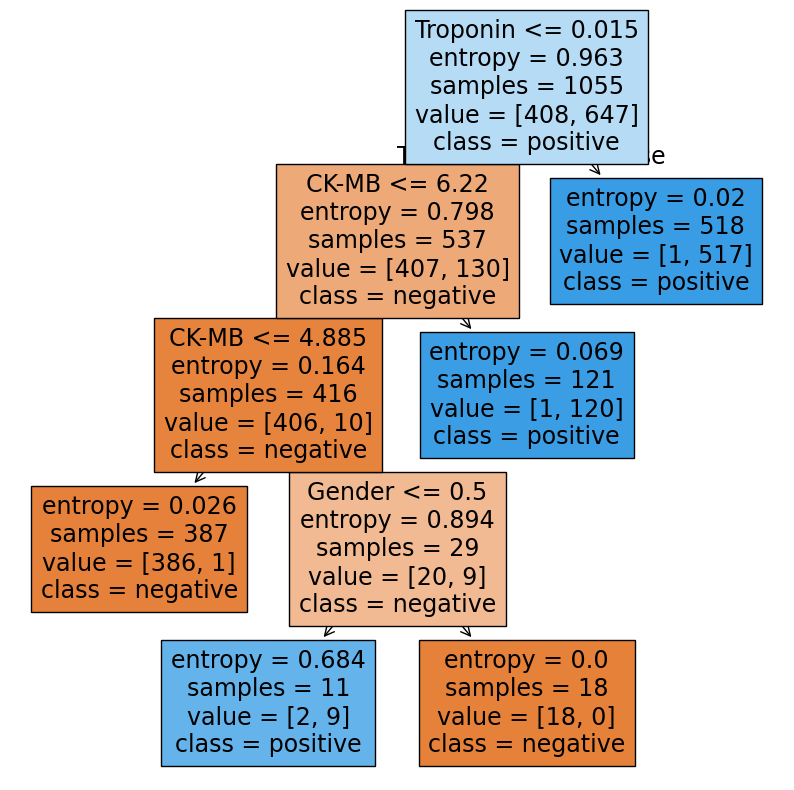

In [19]:
fig=plt.figure(figsize=(10,10))
names=['Age','Gender','Heart rate','Systolic blood pressure','Diastolic blood pressure','Blood sugar','CK-MB','Troponin']
tree=plot_tree(model,feature_names=names,class_names=['negative','positive'],filled=True)
plt.show()

In [20]:
print(export_text(model,feature_names=names,class_names=['negative','positive']))

|--- Troponin <= 0.01
|   |--- CK-MB <= 6.22
|   |   |--- CK-MB <= 4.88
|   |   |   |--- class: negative
|   |   |--- CK-MB >  4.88
|   |   |   |--- Gender <= 0.50
|   |   |   |   |--- class: positive
|   |   |   |--- Gender >  0.50
|   |   |   |   |--- class: negative
|   |--- CK-MB >  6.22
|   |   |--- class: positive
|--- Troponin >  0.01
|   |--- class: positive



In [21]:
grid=GridSearchCV(model,{'max_depth':range(2,10)},cv=10)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'max_depth': 4}


In [22]:
grid=GridSearchCV(model,{'max_leaf_nodes':range(2,10)},cv=10)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'max_leaf_nodes': 5}
